# Exercício PA1-3

Exercício com data de entrega para 5 de outubro de 2020.


Aluno: Noé de Lima Bezerra

<noe_lima@id.uff.br>

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import display, Math, Image
sp.init_printing(use_latex='mathjax',latex_mode='equation*')

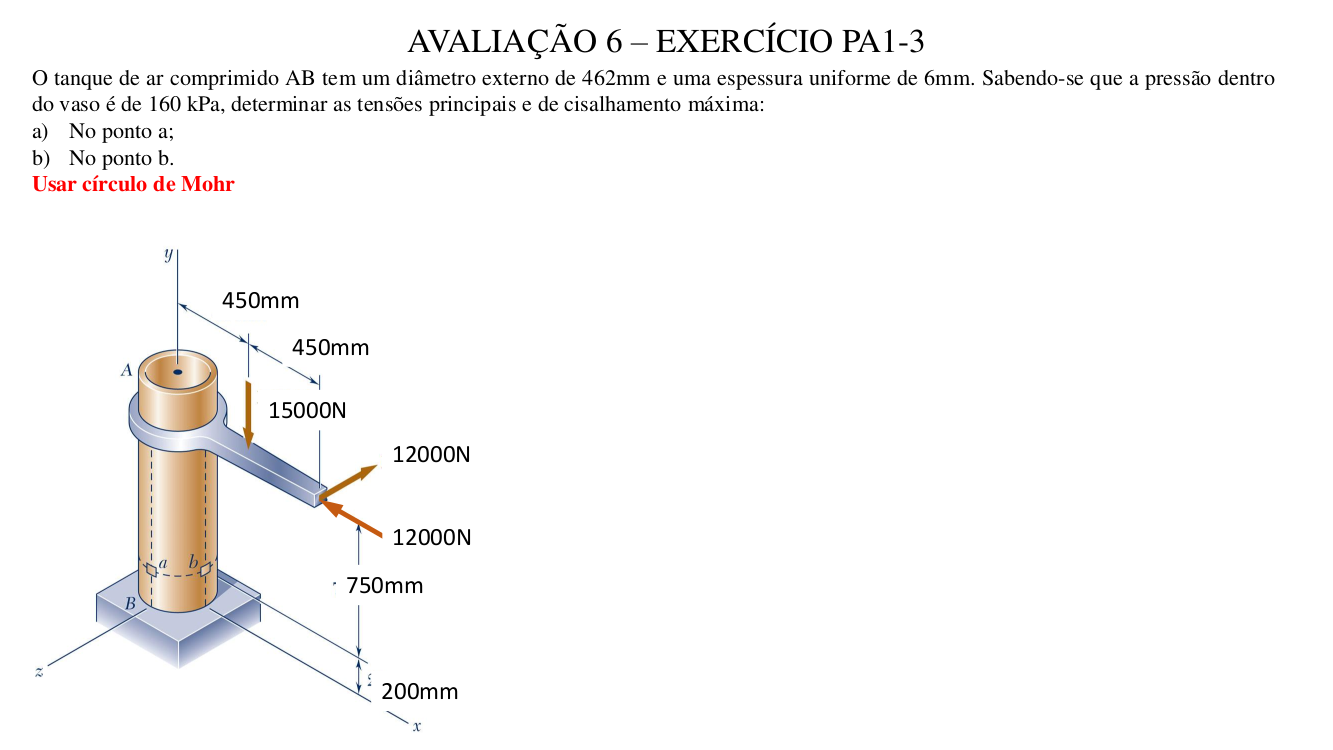

In [2]:
Image("Figuras/PA1-3.png")

# Solução

## Círculo de Mohr

In [3]:
def mohr(s_x,s_y,t_xy):
    if t_xy == 0:
        t_xy = 1e-10  # Evitar divisão por zero!
    z = np.linspace(0,360,360)
    r = np.sqrt((((s_x-s_y)/2)**2)+t_xy**2)
    s_med = ((s_x+s_y)/2)
    tg2tc = -(s_x-s_y)/(2*t_xy)
    tg2tp = -1/(tg2tc)
    tc = np.degrees(np.arctan(tg2tc)/2)
    tp = np.degrees(np.arctan(tg2tp)/2)
    x = s_med + r*np.cos(np.radians(z))
    y = r*np.sin(np.radians(z))
    a = ([s_x,s_x,s_y,s_y,s_x])
    b = ([0,t_xy,-t_xy,0,0])
    # Plot
    text = '\n'.join((
        r'$\sigma_{min} = %.1f~MPa$' % (s_med-r,),
        r'$\sigma_{max} = %.1f~MPa$' % (s_med+r,),
        r'$\tau_{max} = %.1f~MPa$' % (r,),
        r'$\theta_{p} = %.0f^{o}$' % (tp,),
        r'$\theta_{c} = %.0f^{o}$' % (tc,)
    ))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.plot(a,b,x,y)
    plt.xlabel(r"$\sigma$", size=18)
    plt.ylabel(r"$\tau$", size=18)
    plt.title("Círculo de Mohr")
    plt.text(s_med-1.6*r,r,text, fontsize=12, verticalalignment='top', bbox=props)
    plt.axis("equal")
    plt.show()

## Esforços Solicitantes

Na seção $S$, vista pelo lado direito, temos os seguintes esforços solicitantes:

In [4]:
mm,N,MPa = sp.symbols("mm,N,MPa")
kN = 1000*N
m = 1000*mm
kPa = 1e-3*MPa

### Na Seção $B$

\begin{equation*}
    \left\{\begin{matrix}
        \left|V_{x}\right| & = & 12~kN\cdot m \\
        N_{y} & = & -15~kN\cdot m \\
        \left|V_{z}\right| & = & 12~kN\cdot m \\
        M_{x} & = & -12\times 0,75 & = & -9~kN\cdot m \\
        T_{y} & = & 0,9\times 12 & = & 10,8~kN\cdot m \\
        M_{z} & = & - 0,45 \times 15 + 0,75 \times 12 & = & 2,25~kN\cdot m
    \end{matrix}\right.
\end{equation*}

In [5]:
t = 6*mm
d = 462*mm
A = np.pi*((d**2)-(d-2*t)**2)
I = np.pi*((d**4)-(d-2*t)**4)/64
J = np.pi*((d**4)-(d-2*t)**4)/32
Q = ((d**3)-(d-2*t)**3)/12

In [6]:
V_x = -12e3*N
P_y = -15e3*N
V_z = -12e3*N
M_x = -9e6*N*mm
T_y = 10.8e6*N*mm
M_z = 2.25e6*N*mm
P = 160*kPa

## Ponto $a$

O ponto $a$ encontra-se no plano $xy$. Portanto, as tensões são: $\sigma_{x}$, $\sigma_{y}$ e $\tau_{xy}$.

In [7]:
sigma_xa = P*(d/2)/t
sigma_ya = (P_y/A - M_x*(d/2)/I + P*(d/2)/(2*t)).subs(N/mm**2,MPa)
tau_xya = (T_y*(d/2)/J + V_x*Q/(I*t)).subs(N/mm**2,MPa)
display(sigma_xa,sigma_ya,tau_xya)

6.16⋅MPa

11.947804422312⋅MPa

-0.00128887749538631⋅MPa

Portanto,

\begin{equation*}
    \left\{\begin{matrix}
        \sigma_{x_{a}} & = & 6,16~MPa \\
        \sigma_{y_{a}} & = & 11,95~MPa \\
        \tau_{xy_{a}} & = & 1,54~MPa
    \end{matrix}\right.
\end{equation*}

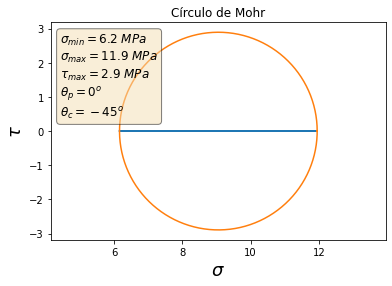

In [8]:
mohr(float(sigma_xa.subs(MPa,1)),float(sigma_ya.subs(MPa,1)),float(tau_xya.subs(MPa,1)))

Como $\sigma_{I} \gt 0$ e $\sigma_{II}\gt 0$, temos $\tau_{max} = \frac{\sigma_{I}}{2}=6~MPa$.

## Ponto $b$

O ponto $b$ encontra-se no plano $yz$. Portanto, as tensões são: $\sigma_{y}$, $\sigma_{z}$ e $\tau_{yz}$.

In [9]:
sigma_yb = (P_y/A + M_z*(d/2)/I + P*(d/2)/(2*t)).subs(N/mm**2,MPa)
sigma_zb = P*(d/2)/t
tau_yzb = (-T_y*(d/2)/J - V_z*Q/(I*t)).subs(N/mm**2,MPa)
display(sigma_yb,sigma_zb,tau_yzb)

4.96974110744499⋅MPa

6.16⋅MPa

0.00128887749538631⋅MPa

Portanto,

\begin{equation*}
    \left\{\begin{matrix}
        \sigma_{y_{b}} & = & 4,97~MPa \\
        \sigma_{z_{b}} & = & 6,16~MPa \\
        \tau_{yz_{b}} & = & 0~MPa
    \end{matrix}\right.
\end{equation*}

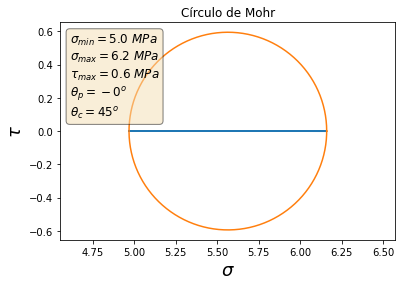

In [10]:
mohr(float(sigma_yb.subs(MPa,1)),float(sigma_zb.subs(MPa,1)),float(tau_yzb.subs(MPa,1)))

Como $\sigma_{I} \gt 0$ e $\sigma_{II}\gt 0$, temos $\tau_{max} = \frac{\sigma_{I}}{2}=3,1~MPa$.